<a href="https://colab.research.google.com/github/salwaa-hub/jbp10_machinelearning/blob/main/jbp10_machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEEP LEARNING (CNNS)** (Salwa Salsabila D - 4.33.23.2.25)

Dengan menggunakan pengetahuan tentang CNN pada bab ini, silakan susun Deep Neural Network sendiri untuk mendapatkan tingkat akurasi lbih dari 99% pada dataset berikut:
https://www.kaggle.com/c/digit-recognizer/

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [15]:
# Load & Preprocess Data
train_df = pd.read_csv('train.csv')
X = train_df.drop('label', axis=1).values / 255.0
y = to_categorical(train_df['label'].values, num_classes=10)
X = X.reshape(-1, 28, 28, 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

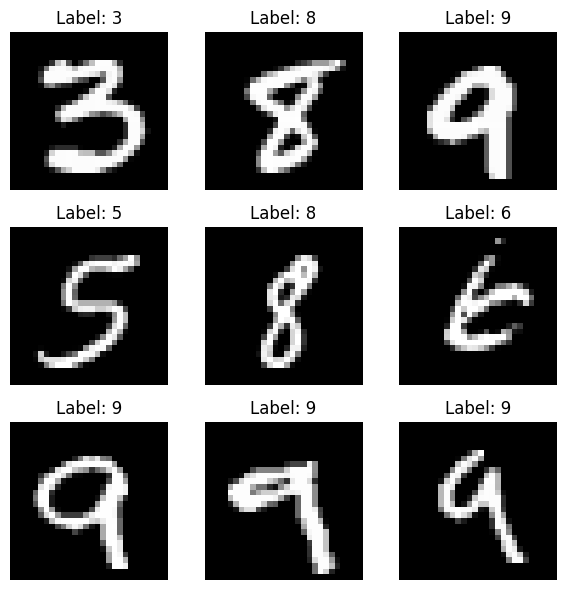

In [5]:
# Visualize Sample Data
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

In [22]:
from tensorflow.keras.layers import Input  # pastikan ini ada di import

model = Sequential([
    Input(shape=(28,28,1)),  # layer input yang baru
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
# Train the Model
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(patience=10, restore_best_weights=True),
                               ReduceLROnPlateau(patience=5)])

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


493/493 ━━━━━━━━━━━━━━━━━━━━ 98s 185ms/step - accuracy: 0.1064 - loss: nan - val_accuracy: 0.1049 - val_loss: nan - learning_rate: 0.0010
Epoch 2/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 83s 169ms/step - accuracy: 0.0970 - loss: nan - val_accuracy: 0.1049 - val_loss: nan - learning_rate: 0.0010
Epoch 3/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 143s 172ms/step - accuracy: 0.0979 - loss: nan - val_accuracy: 0.1049 - val_loss: nan - learning_rate: 0.0010
Epoch 4/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 139s 166ms/step - accuracy: 0.0960 - loss: nan - val_accuracy: 0.1049 - val_loss: nan - learning_rate: 0.0010
Epoch 5/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 82s 166ms/step - accuracy: 0.0978 - loss: nan - val_accuracy: 0.1049 - val_loss: nan - learning_rate: 0.0010
Epoch 6/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 81s 165ms/step - accuracy: 0.0966 - loss: nan - val_accuracy: 0.1049 - val_loss: nan - learning_rate: 1.0000e-04
Epoch 7/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 84s 170ms/step - accuracy: 0.0948 - loss: nan - val_accuracy: 0.1049 - 

In [9]:
# Evaluate Performance
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1012 - loss: nan
Validation Accuracy: 10.49%


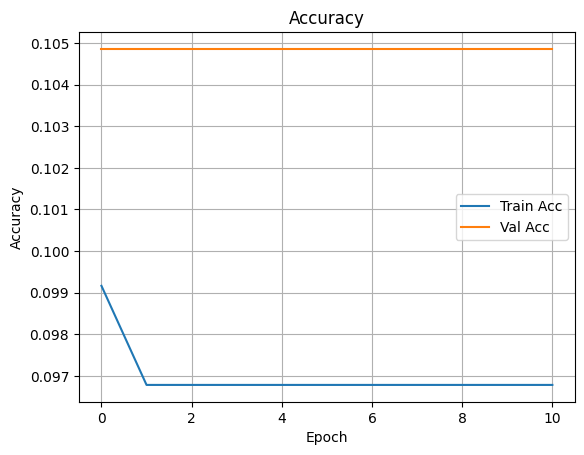

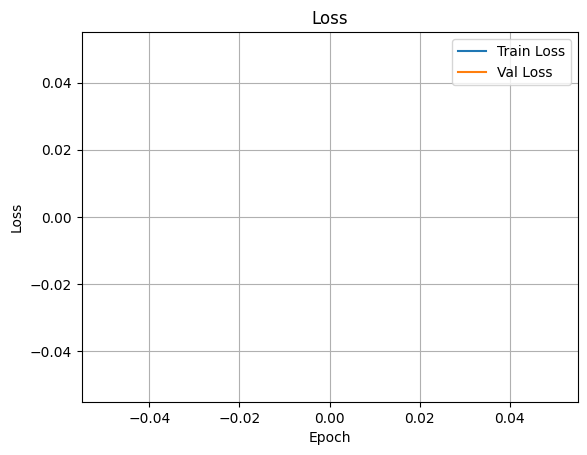

In [10]:
# Plot Accuracy and Loss
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step


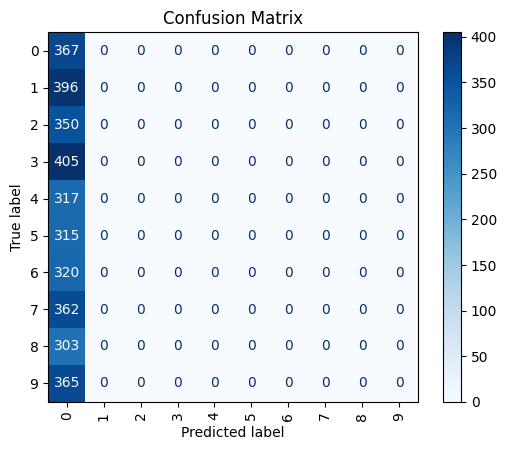

In [11]:
# Confusion Matrix
val_preds = model.predict(X_val)
val_labels = np.argmax(y_val, axis=1)
val_preds_labels = np.argmax(val_preds, axis=1)

cm = confusion_matrix(val_labels, val_preds_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

In [16]:
# Prepare Submission
test_df = pd.read_csv('test.csv')
X_test = test_df.values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)

pred = model.predict(X_test)
pred_labels = np.argmax(pred, axis=1)

submission = pd.DataFrame({
    "ImageId": np.arange(1, len(pred_labels) + 1),
    "Label": pred_labels
})
submission.to_csv("submission.csv", index=False)

826/826 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step


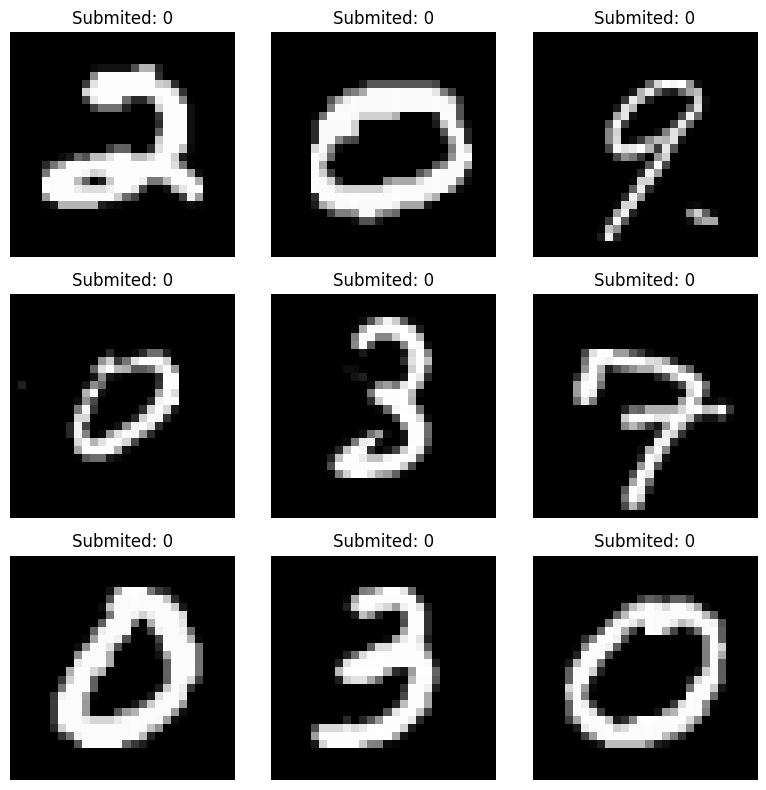

In [17]:
# Visualisasi 9 gambar test pertama dengan prediksi
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Submited: {pred_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()